## Institut National des Postes et Télécommunications
### Filiere Data Engineer
### Machine learnig TP1: Supervised Learning

In [1]:
### importing libraries:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

### Data Preparation

In [3]:
### loading data
heart_disease=pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart_disease.shape

(303, 14)

In [5]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
#### Create X , y
X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

In [9]:
print(f"X ==> {X.shape}")
print(f"y ==> {y.shape}")

X ==> (303, 13)
y ==> (303,)


In [10]:
#### splitting data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)


In [11]:
print(f"X_train :{X_train.shape} ")
print(f"X_test :{X_test.shape} ")
print(f"y_train :{y_train.shape}")
print(f"y_test :{y_test.shape} ")

X_train :(242, 13) 
X_test :(61, 13) 
y_train :(242,)
y_test :(61,) 


### preparation of a Learning Model

In [12]:
#### import the RandomForestClassifier from sklearn's ensemble module
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()

### Fitting Model and Predictions

In [13]:
# Fit the Model
clf.fit(X_train,y_train)

RandomForestClassifier()

In [14]:
### Use the fitted model to make predictions
y_preds=clf.predict(X_test)

###  Model Evaluation

In [15]:
#### fitting model using score() ===> training data
print(f"training score {clf.score(X_train,y_train)}")
#### fitting model using score() ===> test data
print(f"test score {clf.score(X_test,y_test)}")

training score 1.0
test score 0.819672131147541


1. we notice that our model is overfitted 
2. the metric score is the accuracy of our model
3. our model has a good score in training data but it doesn't work well for testing data

#### conclusion: we have an overfitting

### trying another classification Algorithms

In [16]:
### importing LinearSVC
from sklearn.svm import LinearSVC

### importing KNeighborsClassifier 
from sklearn.neighbors import KNeighborsClassifier

### importing SVC 
from sklearn.svm import SVC

### importing Logisticregression
from sklearn.linear_model import LogisticRegression


In [44]:
### instantiating of model
models={"LinearSVC":LinearSVC(),
        "KNeighborsClassifier":KNeighborsClassifier(),
        "SVC":SVC(),
        "LogisticRegression":LogisticRegression()
        }
### creating an empty dictionary:
results={}        

In [22]:
import warnings
warnings.filterwarnings("ignore")

In [52]:
#### looping over models
np.random.seed(42)
for model_name,model in models.items():
    model.fit(X_train,y_train)
    results[model_name]=model.score(X_test,y_test)

results    

{'LinearSVC': 0.8524590163934426,
 'KNeighborsClassifier': 0.7049180327868853,
 'SVC': 0.639344262295082,
 'LogisticRegression': 0.8852459016393442}

LogisticRegression works well
yes whenever we run the cell again results change,regarding to the randomness


In [39]:
results_df=pd.DataFrame(results.values(),results.keys(),columns=["Accuracy"])

In [40]:
results_df

,Accuracy
LinearSVC,0.852459
KNeighborsClassifier,0.704918
SVC,0.639344
LogisticRegression,0.885246


In [41]:
results_df["Accuracy"]

LinearSVC               0.852459
KNeighborsClassifier    0.704918
SVC                     0.639344
LogisticRegression      0.885246
Name: Accuracy, dtype: float64

<AxesSubplot: >

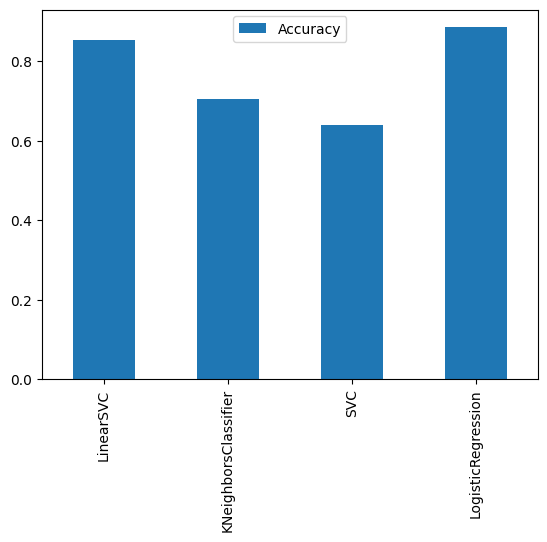

In [43]:
#### creationg a bar plot
results_df.plot.bar()

### Hyperparameter Tuning

In [53]:
### Different Logisticregression hyperparameters
log_reg_grid={"C":np.logspace(-4,4,20),
                "solver":["liblinear"]}

In [54]:
# Setup np random seed of 42
np.random.seed(42)

# import randomizedsearchCV

from sklearn.model_selection import RandomizedSearchCV

rs_log_reg=RandomizedSearchCV(estimator=LogisticRegression(),
                              param_distributions=log_reg_grid,
                              cv=5,
                              n_iter=5,
                              verbose= 1 )

## Fit theinstance of RandomizedSearchCv
randomized_fit=rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [55]:
### finding best params
randomized_fit.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [58]:
### score the instance of RandomizedSearchCV 
model=randomized_fit.best_estimator_

In [62]:
model.score(X_test,y_test)

0.8688524590163934

### Evaluation du modele de classificateur

In [63]:
clf=LogisticRegression(solver='liblinear',C=0.23357214690901212)
clf.fit(X_train,y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [64]:
### Importing confusion_matrix and classification_report 
from sklearn.metrics import confusion_matrix,classification_report

### Importing precision_score,recall_score and f1_score 
from sklearn.metrics import precision_score,recall_score,f1_score

### Importing plot_roc_curve 
from sklearn.metrics import plot_roc_curve

In [65]:
### Make predictions 
y_preds=clf.predict(X_test)

In [66]:
### Create a confusion matrix
print(confusion_matrix(y_test,y_preds))

[[23  5]
 [ 3 30]]


<AxesSubplot: >

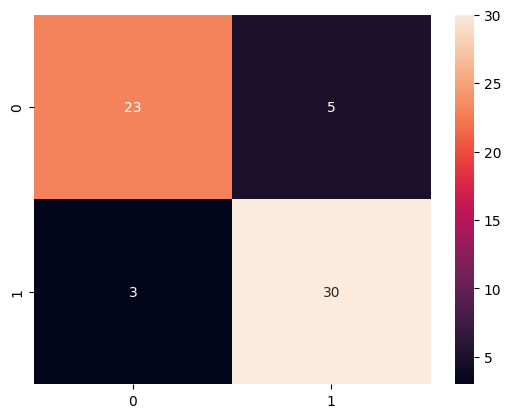

In [68]:
sns.heatmap(confusion_matrix(y_test,y_preds),annot=True)

In [69]:
#### classification report 
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85        28
           1       0.86      0.91      0.88        33

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [70]:
### Find the precision score of the model using precision_score()
precision_score(y_test,y_preds)

0.8571428571428571

In [71]:
recall_score(y_test,y_preds)

0.9090909090909091

In [72]:
f1_score(y_test,y_preds)

0.8823529411764706

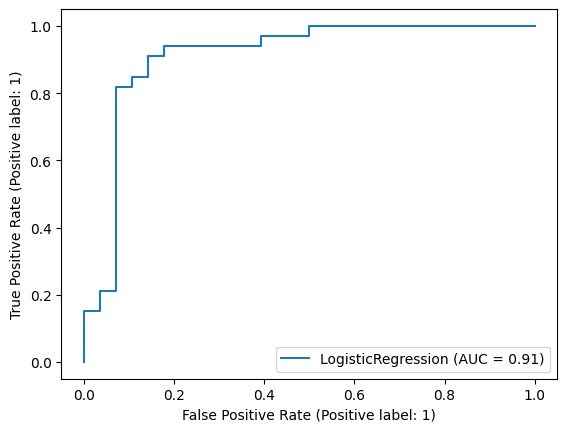

In [73]:
#Plot a ROC curve using our current machine learning model using plot_roc_curve
plot_roc_curve(model,X_test,y_test)

In [74]:
### import cross_val_score 
from sklearn.model_selection import cross_val_score

cross_val_score(model,
                X_train,
                y_train,
                scoring="accuracy",
                cv=5)

array([0.83673469, 0.83673469, 0.89583333, 0.75      , 0.83333333])

In [75]:
cross_val_acc=np.mean(cross_val_score(model,
                X_train,
                y_train,
                scoring="accuracy",
                cv=5))

In [76]:
cross_val_acc

0.8305272108843538

In [77]:
#### Find the cross-validated precision
precision=np.mean(cross_val_score(model,
                X_train,
                y_train,
                scoring="precision",
                cv=5))
recall=np.mean(cross_val_score(model,
                X_train,
                y_train,
                scoring="recall",
                cv=5))
f1_score=np.mean(cross_val_score(model,
                X_train,
                y_train,
                scoring="f1",
                cv=5))

In [78]:
print(precision)
print(recall)
print(f1_score)

0.808048681541582
0.9176638176638177
0.8558108558108559


In [79]:
#### Import the dump and load functions from the joblib library
from  joblib import dump,load

In [80]:
dump(model,"model")

['model']

In [81]:
model_load=load("model")


In [82]:
model_load.score(X_test,y_test)

0.8688524590163934